# Theoretical Foundations of Computer Science II COMP2870

**School of Computer Science, University of Leeds**

# Lab03: Linear systems of equations

These labsheets contains *formative activities* (which contribute to your learning) and *summative activities* (which you will complete and submit to be assessed as part of your portfolio).

<div class="alert alert-block alert-danger">
<b>Portfolio exercise</b>

Exercise marked with a red box is a summative exercise and must be submitted as part of your portfolio. You should use Gradescope to submit portfolio activities.
</div>

### Expectations

1. **Timeliness** You should complete all of the activities in the order provided and submit your portfolio evidence on Gradescope before the completion date (Friday 14 November, 5pm).

2. **Presentation** You should present all of your work clearly and concisely following additional guidance below.

3. **Integrity** You are responsible for ensuring that all the evidence you submit as part of your portfolio is entirely your own work. You can find out more about Academic integrity on the Skill@library website. All work you submit for assessment is subject to the academic integrity policy.

### Feedback
Feedback on formative activities will be provided via lab classess and tutorials. Feedback on evidence submitted as part of the portfolio will be available on Gradescope.

### Support opportunities
Support with the activity sheet is available in the lab classes and tutorials. Individual support is available via the online booking system.

### Statement on the Use of Generative AI (Red Category)
This assessment is RED according to the GenAI traffice light system. **Generative AI (GenAI) tools cannot be used**. The aim of this task is for you to develop and demonstrate the specific skills and knowledge covered in the taught sessions. We want you to independently develop your understanding, criticical thinking skills and demonstrate fundamental skills that will be required throughout your programme. Reliance on GenAI could prevent you from achieving the intended learning outcomes and may impeded your skill development.

You are still permitted to use dictionaries, thesauri, spelling and grammer-checking software to help identify and correct spelling mistakes and grammatrical errors (even if they are powered by GenAI). However, you should not use any software to rewrite sentence or make substantial changes to your original text, as this would be against the rules of this category.

Failure to comply with these requirements may be considered academic misconduct under University regulations.

### Expected time for completion:
1-2 hours

### Expected completion date:
Friday 14 November, 5pm

## Coursework summary

This lab covers material on how to solve systems of linear equations.

## Learning outcomes

On completion of this activity sheet you will have demonstrated that you can:

- apply direct and iterative solvers to solve systems of linear equations; implement methods using floating point numbers and investigate computational cost using computer experiments

## How to access the lab

You can access the lab worksheet directly through [minerva](https://minerva.leeds.ac.uk/), [github](https://github.com/COMP2870-2526/linear-algebra-student-labs) or using Noteable (accessible via Minerva - see `README.md` for detailed instructions).

These lab worksheets are written using ['Jupyter Notebooks'](https://jupyter.org/). Many, many tutorials and guides are [available online](https://www.dataquest.io/blog/jupyter-notebook-tutorial/).

First some helper code for generating good matrices for LU factorisation tests. 

In [11]:
import numpy as np
from scipy.sparse import diags


def generate_safe_system(n):
    """
    Generate a linear system A x = b where A is strictly diagonally dominant,
    ensuring LU factorization without pivoting will work.

    Parameters:
        n (int): Size of the system (n x n)

    Returns:
        A (ndarray): n x n strictly diagonally dominant matrix
        b (ndarray): RHS vector
        x_true (ndarray): The true solution vector
    """

    k = [np.ones(n - 1), -2 * np.ones(n), np.ones(n - 1)]
    offset = [-1, 0, 1]
    A = diags(k, offset).toarray()

    # Solution is always all ones
    x_true = np.ones((n, 1))

    # Compute b = A @ x_true
    b = A @ x_true

    return A, b, x_true


ModuleNotFoundError: No module named 'scipy'

## Exercise 1: LU factorisation

<div class="alert alert-block alert-danger">
<b>Portfolio exercise</b>
You should submit:

1. Your code for `lu_factorisation`
2. The determinant of `A_large` from Exercise 1.3.
3. The plot of run times for LU factorisation (your code) and Gaussian elimination (from the notes)
</div>

1. Implement the algorithm for LU factorisation as described [in the
notes](https://comp2870-2526.github.io/linear-algebra-notes/src/lec04.html#sec-LU-factorisation).
You should implement a Python function which accepts an $n \times n$
matrix $A$ represented as a numpy array and returns one lower triangular
matrix $L$ and one upper triangular matrix $U$ with $A = LU$.

    Here is some starter code:

In [ ]:
def lu_factorisation(A):
    """
    Compute the LU factorisation of a square matrix A.

    The function decomposes a square matrix ``A`` into the product of a lower
    triangular matrix ``L`` and an upper triangular matrix ``U`` such that:

    .. math::
        A = L U

    where ``L`` has unit diagonal elements and ``U`` is upper triangular.

    Parameters
    ----------
    A : numpy.ndarray
        A 2D NumPy array of shape ``(n, n)`` representing the square matrix to
        factorise.

    Returns
    -------
    L : numpy.ndarray
        A lower triangular matrix with shape ``(n, n)`` and unit diagonal.
    U : numpy.ndarray
        An upper triangular matrix with shape ``(n, n)``.
    """
    n, m = A.shape
    if n != m:
        raise ValueError(f"Matrix A is not square {A.shape=}")

    # construct arrays of zeros
    L, U = np.zeros_like(A), np.zeros_like(A)

    # ...
    L[0, 0] = 1
    U[0, 0] = 1

2. Test your solution on the matrix $A$:
   $$
   A = \begin{pmatrix}
   4 & 2 & 0 \\ 2 & 3 & 1 \\ 0 & 1 & 2.5
   \end{pmatrix}.
   $$
   First compute the LU factorisation by hand and then check $A = L U$.

In [4]:
import numpy as np
from lu_factorisation import lu_factorisation

A = np.array([[4, 2, 0],
              [2, 3, 1],
              [0, 1, 2.5]], dtype=float)

L, U = lu_factorisation(A)

print("L =\n", L)
print("U =\n", U)
print("Check A = L @ U:", np.allclose(A, L @ U))



L =
 [[1.  0.  0. ]
 [0.5 1.  0. ]
 [0.  0.5 1. ]]
U =
 [[4. 2. 0.]
 [0. 2. 1.]
 [0. 0. 2.]]
Check A = L @ U: True


3. Consider the large matrix given by:

In [12]:
A_large, b_large, x_large = generate_safe_system(100)



NameError: name 'generate_safe_system' is not defined

We can use the LU factorisation as another way to compute the determinant of a matrix.
We can use the fact that we can easily compute the determinant of triangular matrix and that $\det(XY) = \det(X) \det(Y)$.

Use this following code to determine the determinant of `A`:

In [9]:
def determinant(A):
    n = A.shape[0]
    L, U = lu_factorisation(A)

    det_L = 1.0
    det_U = 1.0

    for i in range(n):
        det_L *= L[i, i]
        det_U *= U[i, i]

    return det_L * det_U


4. Combine your implementation of LU factorisation with the forwards and
backwards solve from the lecture notes to create a solver for a system
of linear equations. Compare how long it takes for each part of your
code to run against the code for Gaussian elimination from the lecture
notes.

    Use the following code as a starter:

n: [50, 100, 150, 200, 250, 300]
LU factorisation times: [0.0031663770005252445, 0.015729223001471837, 0.029734249001194257, 0.05327703400143946, 0.08754802200019185, 0.12539626600118936]
LU solve times: [0.0005263410002953606, 0.002046330000666785, 0.004596740000124555, 0.008002963999388157, 0.012584625999807031, 0.018225318999611773]
LU total times: [0.0037097309996170225, 0.02004864900118264, 0.03471388800244313, 0.06127999800082762, 0.10016523500053154, 0.14455068300230778]
GE total times: [0.006472114999269252, 0.02402225999867369, 0.029585006999695906, 0.05288416200164647, 0.08392948400069145, 0.12187911699948017]


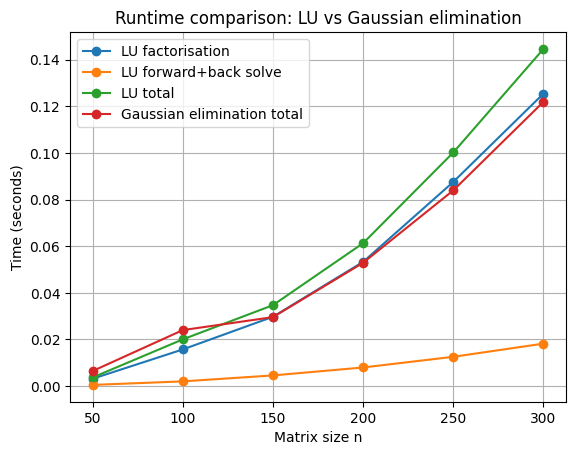

In [ ]:
import numpy as np

# -----------------------------
# LU factorisation (Doolittle)
# Returns P, L, U such that P @ A = L @ U
# L has 1s on the diagonal
# -----------------------------
def lu_factorization(A, pivot=True, eps=1e-12):
    A = np.array(A, dtype=float, copy=True)
    n = A.shape[0]
    if A.shape[1] != n:
        raise ValueError("A must be square")

    L = np.eye(n, dtype=float)
    U = A.copy()
    P = np.eye(n, dtype=float)

    for k in range(n - 1):
        if pivot:
            # choose pivot row
            pivot_row = k + np.argmax(np.abs(U[k:, k]))
            if abs(U[pivot_row, k]) < eps:
                raise ValueError("Matrix is singular (zero pivot).")

            if pivot_row != k:
                # swap rows in U
                U[[k, pivot_row], :] = U[[pivot_row, k], :]
                # swap rows in P
                P[[k, pivot_row], :] = P[[pivot_row, k], :]
                # swap already-computed multipliers in L (only columns < k)
                if k > 0:
                    L[[k, pivot_row], :k] = L[[pivot_row, k], :k]
        else:
            if abs(U[k, k]) < eps:
                raise ValueError("Zero pivot encountered (try pivot=True).")

        # elimination below pivot
        for i in range(k + 1, n):
            L[i, k] = U[i, k] / U[k, k]
            U[i, k:] = U[i, k:] - L[i, k] * U[k, k:]
            U[i, k] = 0.0

    if abs(U[-1, -1]) < eps:
        raise ValueError("Matrix is singular (zero pivot).")

    return P, L, U


# -----------------------------
# Gaussian elimination (forward elimination only)
# Returns (U, b_hat) where U is upper triangular
# and b_hat is the modified RHS after elimination.
# With pivoting, it row-swaps A and b during elimination.
# -----------------------------
def gaussian_elimination(A, b, pivot=True, eps=1e-12):
    A = np.array(A, dtype=float, copy=True)
    b = np.array(b, dtype=float, copy=True)

    n = A.shape[0]
    if A.shape[1] != n:
        raise ValueError("A must be square")
    if b.shape[0] != n:
        raise ValueError("b must have length n")

    for k in range(n - 1):
        if pivot:
            pivot_row = k + np.argmax(np.abs(A[k:, k]))
            if abs(A[pivot_row, k]) < eps:
                raise ValueError("Matrix is singular (zero pivot).")
            if pivot_row != k:
                A[[k, pivot_row], :] = A[[pivot_row, k], :]
                b[[k, pivot_row]] = b[[pivot_row, k]]
        else:
            if abs(A[k, k]) < eps:
                raise ValueError("Zero pivot encountered (try pivot=True).")

        for i in range(k + 1, n):
            m = A[i, k] / A[k, k]
            A[i, k:] -= m * A[k, k:]
            b[i] -= m * b[k]
            A[i, k] = 0.0

    if abs(A[-1, -1]) < eps:
        raise ValueError("Matrix is singular (zero pivot).")

    return A, b


# -----------------------------
# Quick test (optional)
# -----------------------------
if __name__ == "__main__":
    A = np.array([[2, 1, 1],
                  [4, -6, 0],
                  [-2, 7, 2]], dtype=float)
    b = np.array([5, -2, 9], dtype=float)

    P, L, U = lu_factorization(A, pivot=True)
    print("P=\n", P)
    print("L=\n", L)
    print("U=\n", U)
    print("Check P@A - L@U (should be ~0):\n", P@A - L@U)

    U_ge, b_ge = gaussian_elimination(A, b, pivot=True)
    print("U from GE=\n", U_ge)
    print("Modified b from GE=\n", b_ge)





## Exercise 2: LU factorisation with pivoting (Extension)

We can improve the stability of LU factorisation by additionally
including a pivoting step. In this way, we compute a factorisation:
$$
P A = L U.
$$

The new algorithm looks like:

1.  Initialise $P = I_n$ (the $n \times n$ identity), $L = O_n$ (the
    $n \times n$ zero matrix) and $U = O_n$.

2.  For $k = 1, \ldots n$:

    1.  Find the pivot row with the largest $|A_{ik}|$ for
        $i = k, \ldots, n$. Swap rows $k$ and $p$ in $A$ and $L$ and store this
        swap in $P$.
    2.  Set $L_{kk} = 1$.
    3.  Continue with LU factorisation in column $k$ as usual.
    4.  Repeat for next column $k+1$.

Implement this new method and test on the system of linear equations
given by:
$$
\begin{pmatrix}
10 & -7 & 0 \\ -3 & 2.1 - \varepsilon & 6 \\ 5 & -1 & 5
\end{pmatrix}
\begin{pmatrix}
x_1 \\ x_2 \\x_3
\end{pmatrix}
= \begin{pmatrix}
7 \\ 9.9 + \varepsilon \\ 11
\end{pmatrix}.
$$
Test with $\varepsilon = 10^{-14}$.